In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
X=df.iloc[:,[3,4]].values

In [ ]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

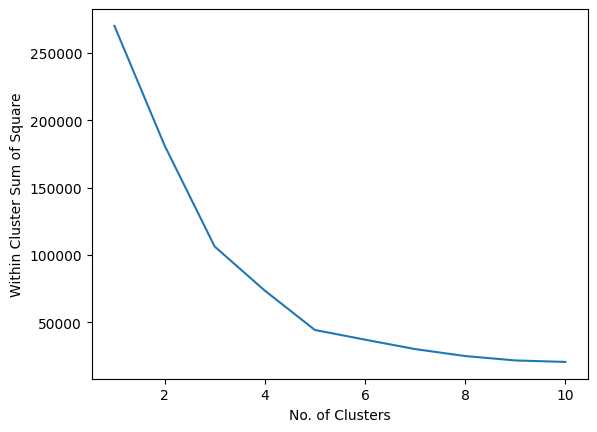

In [10]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("Within Cluster Sum of Square")
plt.show()

In [ ]:
kmeans_model=KMeans(n_clusters=5,init="k-means++",random_state=0)
y_kmeans=kmeans_model.fit_predict(X)

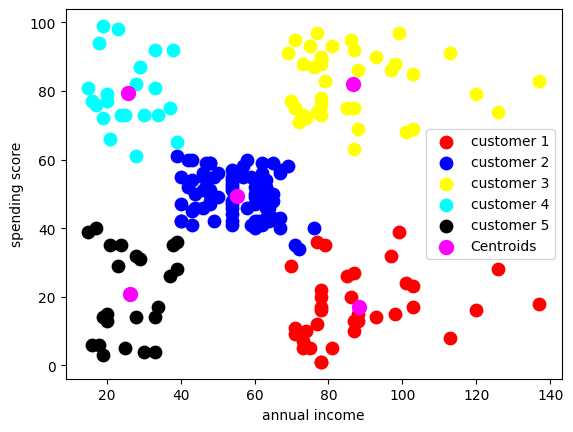

In [19]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80,c='red',label="customer 1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80,c='blue',label="customer 2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80,c='yellow',label="customer 3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=80,c='cyan',label="customer 4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=80,c='black',label="customer 5")
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],s=100,c='magenta',label='Centroids')
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()

# Inference
* The blue cluster is the most dense and has customers who earn and spend and average amount, therefore making them the optimal cutomers for a company to target.
* The black cluster has people who do not earn much and do not spend much either hence they should not be targeted.
* People in the red cluster do earn but do not spend a lot hence they are not our ideal target.
